In [1]:
!pip3 install numpy
!pip3 install pandas
!pip3 install yfinance
!pip3 install scikit-learn
!pip3 install matplotlib

In [2]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
stocks=["AAPL", "MSFT", "TSLA", "GOOGL", "AMZN"]


In [4]:
data = yf.download(stocks, start="2019-01-01", end="2023-12-31")['Close']


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  5 of 5 completed


Since we are trying to develop a strat here for a pair trading srategy we can perform a correlation analysis for the stocks above to recognise the stocks with maximum correlation


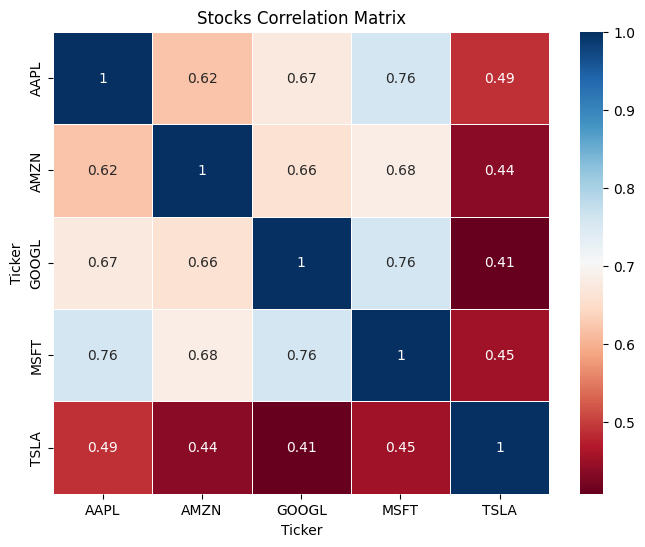

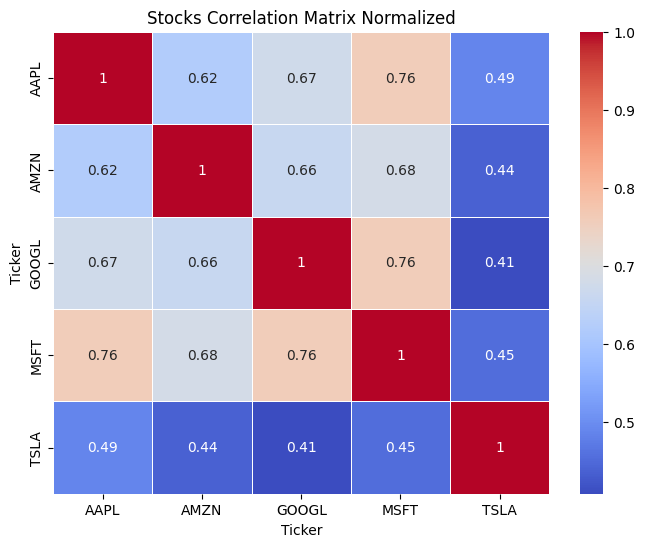

In [5]:


stocks = ["AAPL", "MSFT", "TSLA", "GOOGL", "AMZN"]

normalized_prices = data / data.iloc[0]
returns_np=normalized_prices.pct_change().dropna()

returns = data.pct_change().dropna()

# print('Returns' ,returns)
# print('returns np',returns_np)

correlation_matrix = returns.corr()
correlation_matrix2= returns_np.corr()

# print("Correlation Matrix (2019–2023):")
# print(correlation_matrix)
# print(correlation_matrix2)

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="RdBu", linewidths=0.5)
plt.title("Stocks Correlation Matrix")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix2, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Stocks Correlation Matrix Normalized")
plt.show()

#I am using the correltation for AAPL and MSFT but since the correlation was being calculated based on returns and not the price itself therefore correlation analysis doesnt change.

 From the correlation matrix generated we can confirm that stocks like MSFT-AAPL and GOOGL-AMZN follow a simillar trend which is usually considered a good selection for Pair trading strategy.


In [6]:
print(normalized_prices['AAPL'].tail())
print(normalized_prices['MSFT'].tail())

Date
2023-12-22    5.109078
2023-12-26    5.094565
2023-12-27    5.097203
2023-12-28    5.108551
2023-12-29    5.080841
Name: AAPL, dtype: float64
Date
2023-12-22    3.900929
2023-12-26    3.901763
2023-12-27    3.895618
2023-12-28    3.908219
2023-12-29    3.916134
Name: MSFT, dtype: float64


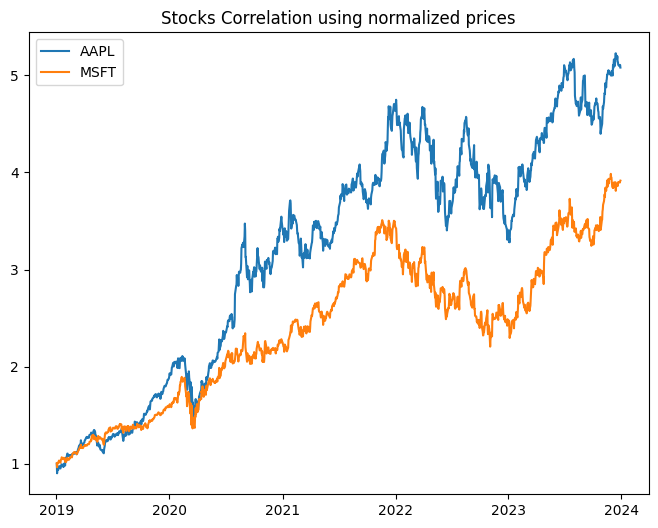

In [7]:
plt.figure(figsize=(8,6))
plt.title("Stocks Correlation using normalized prices")
plt.plot(normalized_prices['AAPL'],label='AAPL')
plt.plot(normalized_prices['MSFT'],label='MSFT')
plt.legend()
plt.show()

<ipython-input-8-9834e29d2d66>:5: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend('AAPL','MSFT')


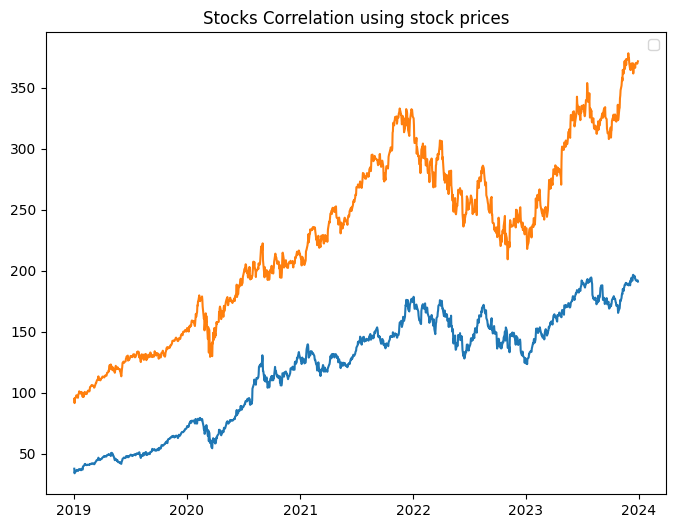

In [8]:
plt.figure(figsize=(8,6))
plt.title("Stocks Correlation using stock prices")
plt.plot(data['AAPL'],label='AAPL')
plt.plot(data['MSFT'],label='MSFT')
plt.legend('AAPL','MSFT')
plt.show()

Apart from this we can perform several tests for confirmation of this trend.

In [9]:
#using cointegration test for these stocks for confirmation of correlation.
import statsmodels.tsa.stattools as ts

result = ts.coint(data['AAPL'], data['MSFT'])
cointegration_t_statistic = result[0]
p_val = result[1]
critical_values_test_statistic_at_1_5_10 = result[2]
print('P value for cointegration test is', p_val)
#p value obtained should be <0.05 for the confirmation of test. (obtained values suggest for a weak cointegration)

P value for cointegration test is 0.3672448843553162


In [10]:
import statsmodels.tsa.stattools as ts
import pandas as pd

# containing stock price data for AAPL and GOOGL
result = ts.coint(data['AAPL'], data['GOOGL'])

cointegration_t_statistic = result[0]
p_val = result[1]
critical_values = result[2]

print('P-value for cointegration test:', p_val)
#for aapl and google its much higher

P-value for cointegration test: 0.5168447430229549
